In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (50,8)

import torch

import librosa
from librosa.filters import mel as librosa_mel_fn
from librosa.display import waveshow

In [2]:
wave, sr = librosa.load("../input/aintme.flac", duration=90)
wave.shape, sr

((1984500,), 22050)

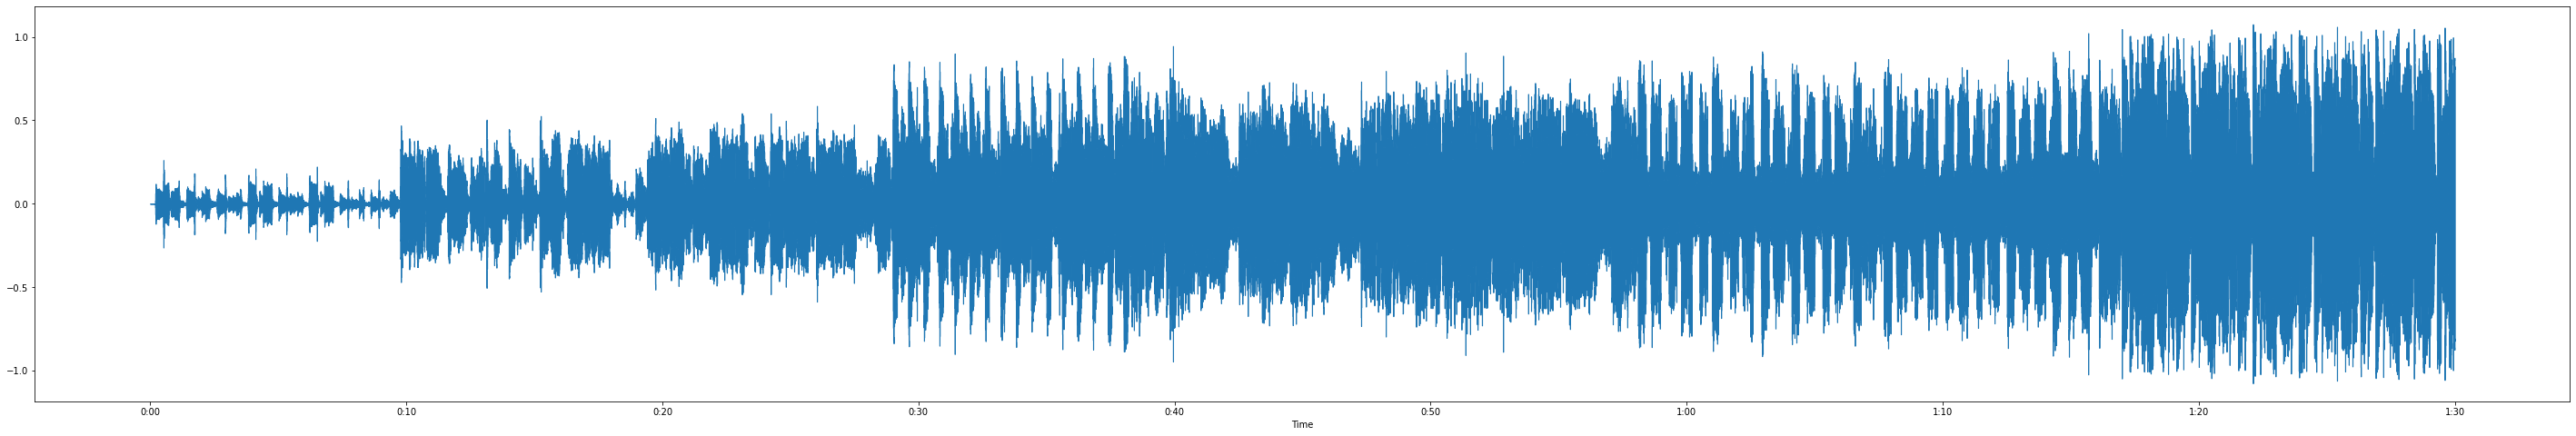

In [3]:
waveshow(wave)

In [4]:
tempo, beat = librosa.beat.beat_track(wave, sr=sr)

/tmp/ipykernel_16686/1863405006.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.56976646 -0.50955874
 -0.57449335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, beat = librosa.beat.beat_track(wave, sr=sr)


In [5]:
librosa.beat.beat_track?

/tmp/ipykernel_16686/3224921955.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.56976646 -0.50955874
 -0.57449335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, beats = librosa.beat.beat_track(y, sr=sr, tightness=15)


NameError: name 'times' is not defined

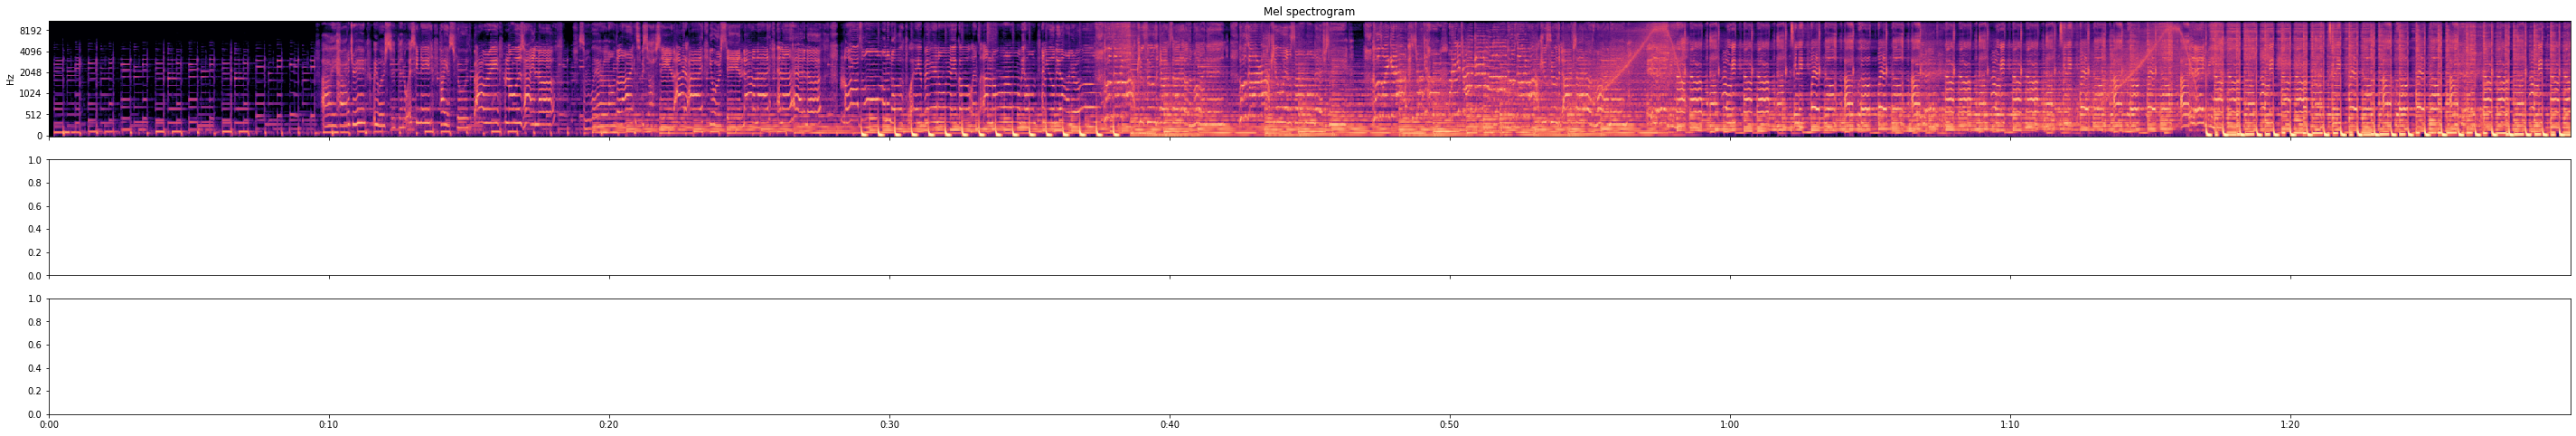

In [6]:
y = wave 

tempo, beats = librosa.beat.beat_track(y, sr=sr, tightness=15)

hop_length = 512
fig, ax = plt.subplots(nrows=3, sharex=True)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()
waveshow(wave)

In [97]:
for o  in times:
    print(o)

0.0
0.023219954648526078
0.046439909297052155
0.06965986394557823
0.09287981859410431
0.11609977324263039
0.13931972789115646
0.16253968253968254
0.18575963718820862
0.2089795918367347
0.23219954648526078
0.25541950113378686
0.2786394557823129
0.301859410430839
0.3250793650793651
0.34829931972789113
0.37151927437641724
0.3947392290249433
0.4179591836734694
0.44117913832199546
0.46439909297052157
0.4876190476190476
0.5108390022675737
0.5340589569160997
0.5572789115646258
0.5804988662131519
0.603718820861678
0.626938775510204
0.6501587301587302
0.6733786848072563
0.6965986394557823
0.7198185941043084
0.7430385487528345
0.7662585034013606
0.7894784580498866
0.8126984126984127
0.8359183673469388
0.8591383219954648
0.8823582766439909
0.905578231292517
0.9287981859410431
0.9520181405895691
0.9752380952380952
0.9984580498866213
1.0216780045351475
1.0448979591836736
1.0681179138321995
1.0913378684807256
1.1145578231292517
1.1377777777777778
1.1609977324263039
1.18421768707483
1.207437641723356

In [98]:
times[beats]

array([ 0.23219955,  1.43963719,  2.62385488,  3.85451247,  5.03873016,
        6.22294785,  7.43038549,  8.63782313,  9.79882086, 11.19201814,
       12.58521542, 14.00163265, 15.23229025, 16.4861678 , 17.76326531,
       19.04036281, 20.31746032, 21.4552381 , 22.59301587, 23.73079365,
       24.86857143, 26.02956916, 27.21378685, 28.39800454, 29.58222222,
       30.76643991, 31.9506576 , 33.13487528, 34.31909297, 35.50331066,
       36.61786848, 37.7324263 , 38.91664399, 40.12408163, 41.33151927,
       42.53895692, 43.7231746 , 44.90739229, 46.09160998, 47.29904762,
       48.48326531, 49.66748299, 50.87492063, 52.08235828, 53.28979592,
       54.49723356, 55.7046712 , 56.91210884, 58.11954649, 59.32698413,
       60.53442177, 61.71863946, 62.9260771 , 64.13351474, 65.34095238,
       66.52517007, 67.73260771, 68.94004535, 70.14748299, 71.33170068,
       72.53913832, 73.72335601, 74.93079365, 76.09179138, 77.25278912,
       78.41378685, 79.71410431, 80.80544218, 82.12897959, 83.19

In [101]:
librosa.onset.onset_strength

<function librosa.onset.onset_strength(*, y=None, sr=22050, S=None, lag=1, max_size=1, ref=None, detrend=False, center=True, feature=None, aggregate=None, **kwargs)>

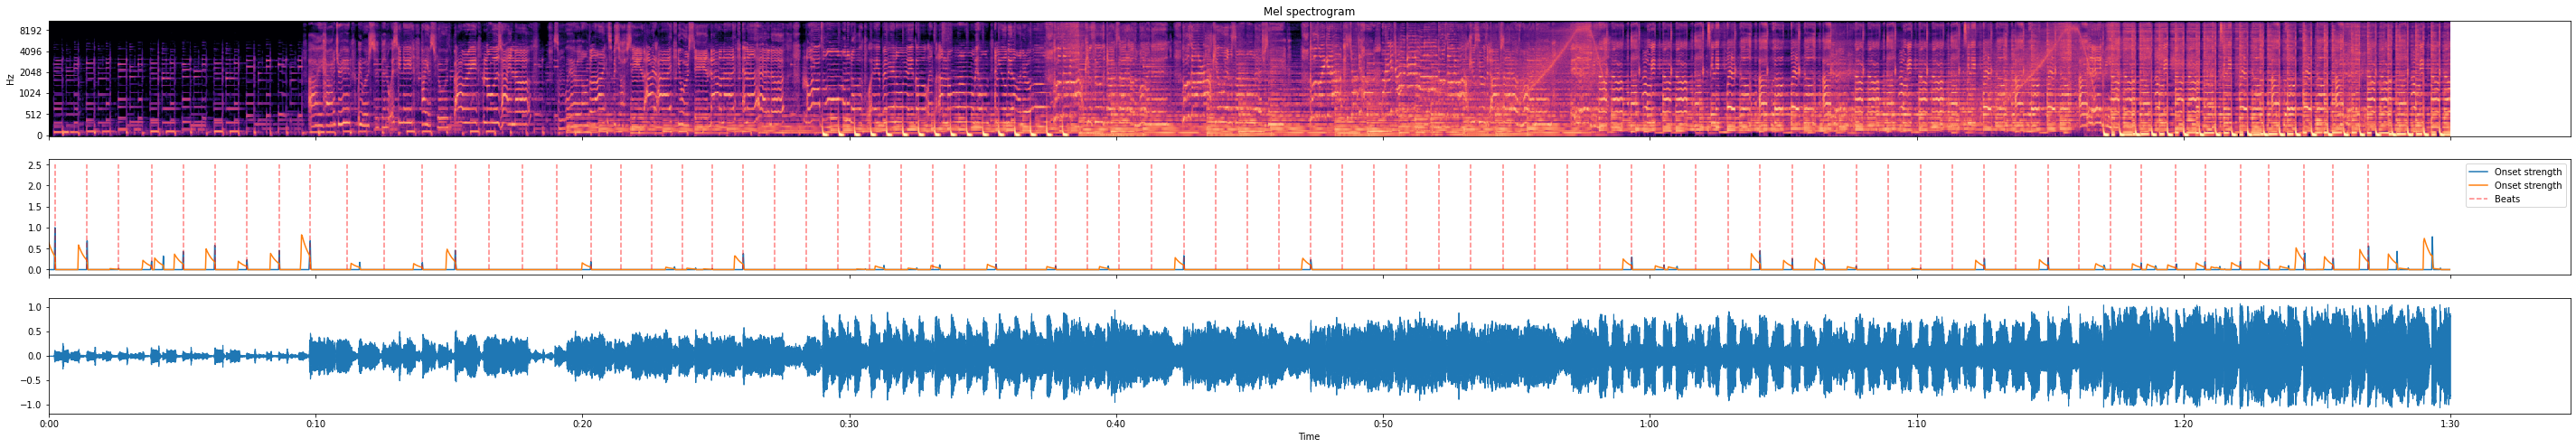

In [110]:
y = wave 

onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, max_size=7)

tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

hop_length = 512
fig, ax = plt.subplots(nrows=3, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()

ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
ax[1].plot(times, numpyEWMA(onset_env, 15), label='Onset strength')
ax[1].vlines(times[beats], 0, 2.5, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()
waveshow(wave)

In [109]:
np.array_split(times[beats], 10)

[array([0.23219955, 1.43963719, 2.62385488, 3.80807256, 5.0155102 ,
        6.22294785, 7.40716553, 8.59138322, 9.79882086]),
 array([10.86693878, 11.95827664, 13.04961451, 14.14095238, 15.23229025,
        16.27718821, 17.32208617, 18.36698413]),
 array([19.41188209, 20.48      , 21.54811791, 22.61623583, 23.68435374,
        24.75247166, 25.82058957, 26.86548753]),
 array([27.91038549, 28.95528345, 30.00018141, 31.04507937, 32.08997732,
        33.13487528, 34.17977324, 35.2246712 ]),
 array([36.26956916, 37.31446712, 38.35936508, 39.40426304, 40.449161  ,
        41.49405896, 42.53895692, 43.60707483]),
 array([44.67519274, 45.74331066, 46.81142857, 47.87954649, 48.9476644 ,
        50.01578231, 51.08390023, 52.15201814]),
 array([53.22013605, 54.31147392, 55.40281179, 56.49414966, 57.58548753,
        58.6768254 , 59.76816327, 60.85950113]),
 array([61.950839  , 63.04217687, 64.13351474, 65.20163265, 66.24653061,
        67.29142857, 68.33632653, 69.38122449]),
 array([70.42612245,

In [8]:
def strided_app(a, L, S): # Window len = L, Stride len/stepsize = S
    nrows = ((a.size - L) // S) + 1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows, L), strides=(S * n, n))


def numpyEWMA(beats, windowSize):
    beats = beats[::-1]
    weights = np.exp(np.linspace(-1., 0., windowSize))
    weights /= weights.sum()

    a2D = strided_app(beats, windowSize, 1)

    returnArray = np.empty((beats.shape[0]))
    returnArray.fill(0)
    for index in (range(a2D.shape[0])):
        returnArray[index + windowSize-1] = np.convolve(weights, a2D[index])[windowSize - 1:-windowSize + 1]
    return returnArray[::-1]

In [79]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
# Or compute pulse with an alternate prior, like log-normal
import scipy.stats
prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr,
                                 prior=prior)
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

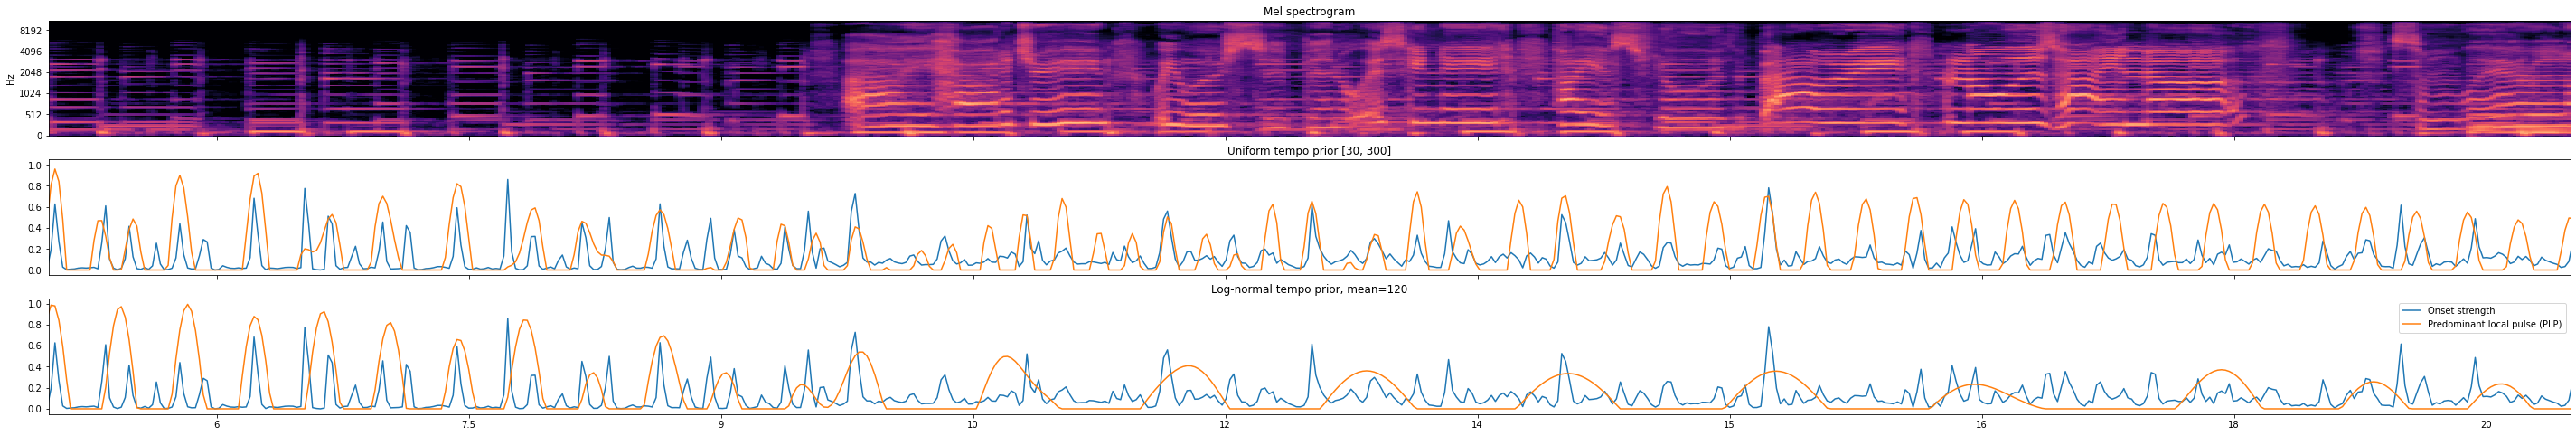

In [80]:
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max), x_axis='time', y_axis='mel', ax=ax[0])

ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
ax[1].plot(librosa.times_like(onset_env),
         librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].plot(librosa.times_like(pulse),
         librosa.util.normalize(pulse),
         label='Predominant local pulse (PLP)')
ax[1].set(title='Uniform tempo prior [30, 300]')
ax[1].label_outer()
ax[2].plot(librosa.times_like(onset_env),
         librosa.util.normalize(onset_env),
         label='Onset strength')
ax[2].plot(librosa.times_like(pulse_lognorm),
         librosa.util.normalize(pulse_lognorm),
         label='Predominant local pulse (PLP)')
ax[2].set(title='Log-normal tempo prior, mean=120', xlim=[5, 20])
ax[2].legend()

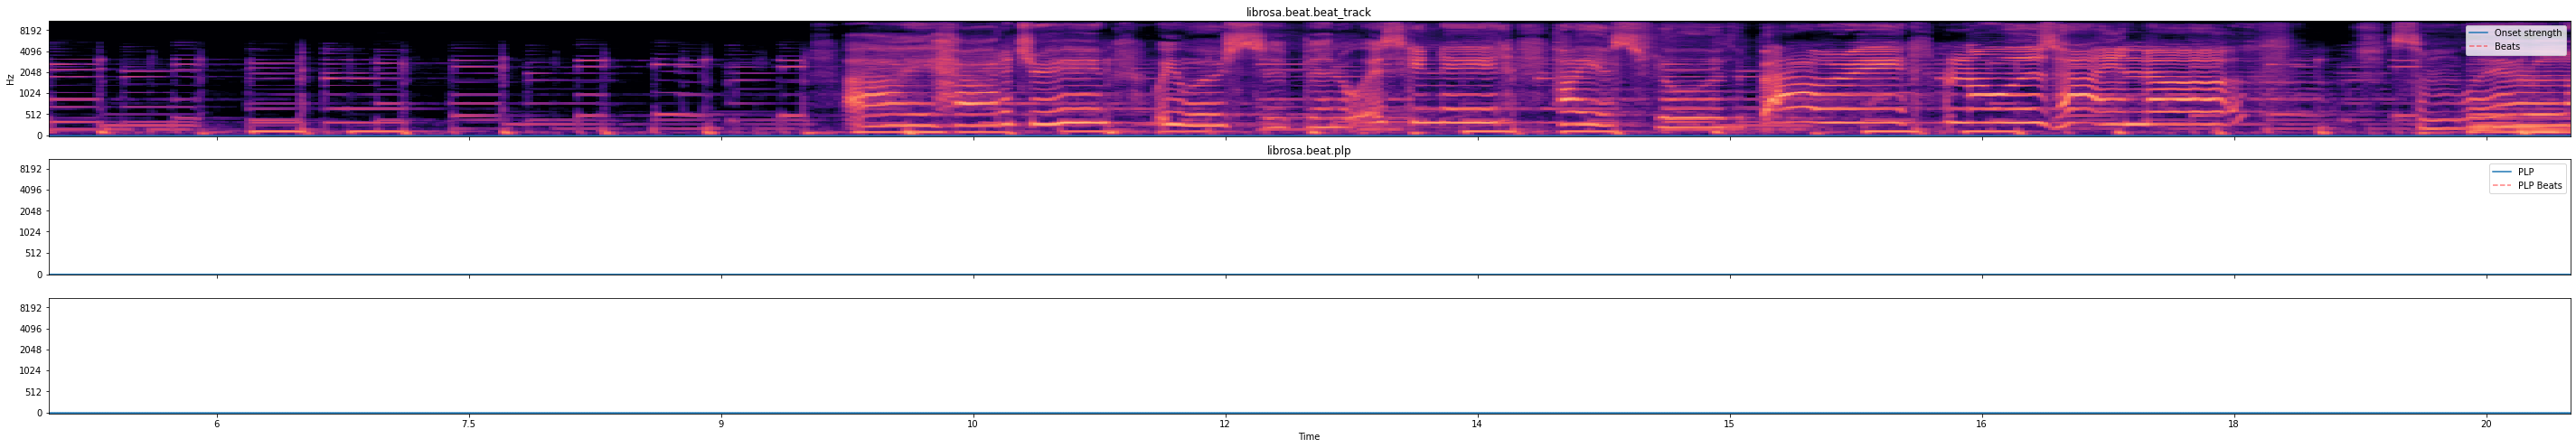

In [83]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
times = librosa.times_like(onset_env, sr=sr)

librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max), x_axis='time', y_axis='mel', ax=ax[0])

ax[0].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track')
ax[0].label_outer()
# Limit the plot to a 15-second window
times = librosa.times_like(pulse, sr=sr)
ax[1].plot(times, librosa.util.normalize(pulse),
         label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp', xlim=[5, 20])
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())
waveshow(wave)

In [11]:
zeros = np.zeros_like(ema)
zeros[grads<0]=-5

In [ ]:
for i in zeros:
    print(i)